# Objetivo: kilómetros de ríos y canales, por municipio, en el Estado de México

Del geoportal de la Conabio:
http://www.conabio.gob.mx/informacion/gis/
se descargó el archivo 'hidrolingw_c.zip', correspondiente a la Hidrología Lótica del Estado de México en coordenadas métricas. Mismo que se extrajo en el directorio default de este notebook.

In [1]:
import geopandas as gpd

In [2]:
hidrologiaLoticaEdoMex = gpd.read_file(filename='hidrolingw/')

In [3]:
hidrologiaLoticaEdoMex.head()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,CLAVE,DESCRIPCIO,geometry
0,33,22,0,0,0.001955,1,300,300,Corriente perenne,LINESTRING (-99.97987072466347 19.061237923737...
1,3,35,0,0,0.003592,2,300,300,Corriente perenne,LINESTRING (-99.90912671381362 19.063515884832...
2,37,27,0,0,0.000780,3,310,310,Corriente intermitente,LINESTRING (-99.48174837533675 19.062813397942...
3,2,38,0,0,0.005037,4,300,300,Corriente perenne,LINESTRING (-99.77364114578728 19.064206107756...
4,38,44,0,0,0.002245,5,300,300,Corriente perenne,LINESTRING (-99.77777412678614 19.061685471564...


In [4]:
hidrologiaLoticaEdoMex.DESCRIPCIO.unique()

array(['Corriente perenne', 'Corriente intermitente', 'Acueductos',
       'Canales', 'L¡mite estatal'], dtype=object)

Hay que descontar el _Límite estatal_ de los datos:

In [5]:
hidrologiaLoticaEdoMex= hidrologiaLoticaEdoMex.\
                    loc[hidrologiaLoticaEdoMex.\
                        DESCRIPCIO != 'L¡mite estatal', : ]

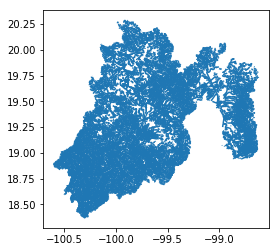

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline

hidrologiaLoticaEdoMex.plot()

Del material didáctico del curso, en el conjunto de datos, se tienen los Municipios de la República Mexicana.

In [7]:
municipios = gpd.read_file('../cursoDatosGeograficos/data/Municipios/')

In [8]:
municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 5 columns):
CVE_ENT     2456 non-null object
CVE_MUN     2456 non-null object
NOM_MUN     2456 non-null object
OID         2456 non-null int64
geometry    2456 non-null object
dtypes: int64(1), object(4)
memory usage: 96.0+ KB


In [9]:
municipios.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,..."
1,09,013,Xochimilco,2,POLYGON ((-99.13301433831455 19.21009500703628...
2,09,008,La Magdalena Contreras,3,POLYGON ((-99.24488741070159 19.27620941570171...
3,09,002,Azcapotzalco,4,POLYGON ((-99.15718110621088 19.50284888316681...
4,09,014,Benito Ju�rez,5,POLYGON ((-99.14349968483091 19.35724145471904...


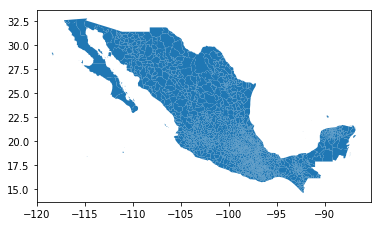

In [10]:
municipios.plot()

Ahora sólo faltaba ubicar los que corresponden al Estado de México. Hallando el estado que contenga el municipio de "Toluca".

In [11]:
municipios.loc[municipios.NOM_MUN=='Toluca',:].head(100)

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
125,15,106,Toluca,126,POLYGON ((-99.55594164086919 19.28626000175705...


In [12]:
edomex=municipios.loc[municipios.CVE_ENT=='15',:]
edomex.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
97,15,082,Tejupilco,98,POLYGON ((-100.5386198917447 18.84411064181707...
98,15,104,Tlalnepantla de Baz,99,(POLYGON ((-99.08857090539354 19.5377291683252...
99,15,075,San Mart�n de las Pir�mides,100,(POLYGON ((-98.80338155096086 19.6595375392584...
100,15,065,Otumba,101,(POLYGON ((-98.75935469928473 19.7142223693961...
101,15,044,Jaltenco,102,(POLYGON ((-99.09852099846559 19.7640083700368...


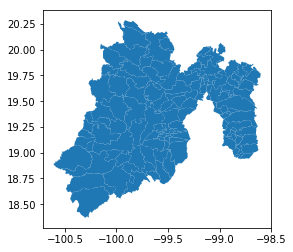

In [13]:
edomex.plot()

In [2]:
print(hidrologiaLoticaEdoMex.crs)
print(edomex.crs)

NameError: name 'hidrologiaLoticaEdoMex' is not defined

Hay que unificar las proyecciones y el sistema de coordenadas geográficas en ambos conjuntos de datos.

In [15]:
hidrologiaLoticaEdoMex=hidrologiaLoticaEdoMex.to_crs({'init': 'epsg:3395'})
edomex=edomex.to_crs({'init': 'epsg:3395'})

In [16]:
print(hidrologiaLoticaEdoMex.crs)
print(edomex.crs)

{'init': 'epsg:3395'}
{'init': 'epsg:3395'}


Intersectando ambos conjuntos de datos, la hidrología sobre los municipios

In [17]:
res_intersect = gpd.sjoin(edomex,hidrologiaLoticaEdoMex, how='right', op='intersects')

In [18]:
res_intersect.head()

,index_left,CVE_ENT,CVE_MUN,NOM_MUN,OID,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,CLAVE,DESCRIPCIO,geometry
index_right,,,,,,,,,,,,,,,
909,97.0,15,082,Tejupilco,98.0,1087,1083,0,0,0.000692,910,300,300,Corriente perenne,LINESTRING (-11146102.95481108 2143215.2869748...
902,97.0,15,082,Tejupilco,98.0,1083,1052,0,0,0.001481,903,300,300,Corriente perenne,LINESTRING (-11146033.17253425 2143249.5785084...
902,143.0,15,086,Temascaltepec,144.0,1083,1052,0,0,0.001481,903,300,300,Corriente perenne,LINESTRING (-11146033.17253425 2143249.5785084...
876,97.0,15,082,Tejupilco,98.0,1052,1021,0,0,0.002293,877,300,300,Corriente perenne,LINESTRING (-11145963.32075094 2143391.7494739...
876,143.0,15,086,Temascaltepec,144.0,1052,1021,0,0,0.002293,877,300,300,Corriente perenne,LINESTRING (-11145963.32075094 2143391.7494739...


Redefiniendo el conjunto de municipios, lo agregamos a la intersección anterior:

In [19]:
edomex = edomex.loc[:,['CVE_MUN','geometry']].rename(columns={'geometry':'other_geometry'})
edomex.head()

,CVE_MUN,other_geometry
index_left,,
97,082,"POLYGON ((-11191907.9714075 2122796.717227336,..."
98,104,(POLYGON ((-11030489.25662159 2204065.41674848...
99,075,(POLYGON ((-10998742.12290648 2218373.36955870...
100,065,(POLYGON ((-10993841.07619666 2224800.37596392...
101,044,(POLYGON ((-11031596.89591572 2230653.56639900...


In [20]:
import pandas as pd

res_ = pd.merge(res_intersect,edomex,how='inner',on='CVE_MUN')
res_.head()

,index_left,CVE_ENT,CVE_MUN,NOM_MUN,OID,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,CLAVE,DESCRIPCIO,geometry,other_geometry
0,97.0,15,082,Tejupilco,98.0,1087,1083,0,0,0.000692,910,300,300,Corriente perenne,LINESTRING (-11146102.95481108 2143215.2869748...,"POLYGON ((-11191907.9714075 2122796.717227336,..."
1,97.0,15,082,Tejupilco,98.0,1083,1052,0,0,0.001481,903,300,300,Corriente perenne,LINESTRING (-11146033.17253425 2143249.5785084...,"POLYGON ((-11191907.9714075 2122796.717227336,..."
2,97.0,15,082,Tejupilco,98.0,1052,1021,0,0,0.002293,877,300,300,Corriente perenne,LINESTRING (-11145963.32075094 2143391.7494739...,"POLYGON ((-11191907.9714075 2122796.717227336,..."
3,97.0,15,082,Tejupilco,98.0,818,1089,0,0,0.012553,913,310,310,Corriente intermitente,LINESTRING (-11147662.20192103 2144386.6332545...,"POLYGON ((-11191907.9714075 2122796.717227336,..."
4,97.0,15,082,Tejupilco,98.0,707,1113,0,0,0.020972,934,310,310,Corriente intermitente,LINESTRING (-11148257.2985375 2144859.78315671...,"POLYGON ((-11191907.9714075 2122796.717227336,..."


Conteniendo res_.geometry la hidrología y res_.other_geometry el polígono del municipio; procedemos a intersectarlos:

In [21]:
res_.geometry = res_['geometry'].\
            intersection(gpd.GeoSeries(res_.other_geometry))
res_.head()

/home/jesus/anaconda3/envs/OSMNX/lib/python3.6/site-packages/geopandas/base.py:29: UserWarning: GeoSeries crs mismatch: {'init': 'epsg:3395'} and None
  other.crs))


,index_left,CVE_ENT,CVE_MUN,NOM_MUN,OID,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,CLAVE,DESCRIPCIO,geometry,other_geometry
0,97.0,15,082,Tejupilco,98.0,1087,1083,0,0,0.000692,910,300,300,Corriente perenne,LINESTRING (-11146102.95481108 2143215.2869748...,"POLYGON ((-11191907.9714075 2122796.717227336,..."
1,97.0,15,082,Tejupilco,98.0,1083,1052,0,0,0.001481,903,300,300,Corriente perenne,LINESTRING (-11146033.17253425 2143249.5785084...,"POLYGON ((-11191907.9714075 2122796.717227336,..."
2,97.0,15,082,Tejupilco,98.0,1052,1021,0,0,0.002293,877,300,300,Corriente perenne,LINESTRING (-11145864.73251804 2143474.2593233...,"POLYGON ((-11191907.9714075 2122796.717227336,..."
3,97.0,15,082,Tejupilco,98.0,818,1089,0,0,0.012553,913,310,310,Corriente intermitente,LINESTRING (-11147061.34953525 2143232.3690387...,"POLYGON ((-11191907.9714075 2122796.717227336,..."
4,97.0,15,082,Tejupilco,98.0,707,1113,0,0,0.020972,934,310,310,Corriente intermitente,LINESTRING (-11147219.58707714 2143170.3870448...,"POLYGON ((-11191907.9714075 2122796.717227336,..."


Tomemos un municipio para ver si la intersección resultó como se esperaba:

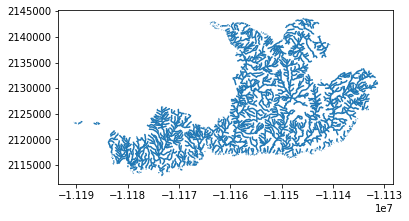

In [22]:
res_[res_.CVE_MUN=='082'].plot()


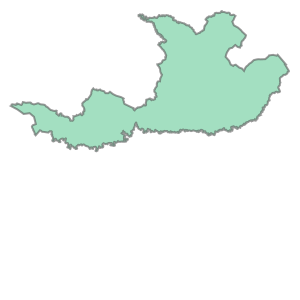

In [23]:
edomex[edomex.CVE_MUN=='082'].other_geometry.values[0]

Añadimos el una columna con el largo de la intersección:

In [24]:
res_['largo']=res_.geometry.length
res_.head()

,index_left,CVE_ENT,CVE_MUN,NOM_MUN,OID,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,CLAVE,DESCRIPCIO,geometry,other_geometry,largo
0,97.0,15,082,Tejupilco,98.0,1087,1083,0,0,0.000692,910,300,300,Corriente perenne,LINESTRING (-11146102.95481108 2143215.2869748...,"POLYGON ((-11191907.9714075 2122796.717227336,...",77.752655
1,97.0,15,082,Tejupilco,98.0,1083,1052,0,0,0.001481,903,300,300,Corriente perenne,LINESTRING (-11146033.17253425 2143249.5785084...,"POLYGON ((-11191907.9714075 2122796.717227336,...",121.594505
2,97.0,15,082,Tejupilco,98.0,1052,1021,0,0,0.002293,877,300,300,Corriente perenne,LINESTRING (-11145864.73251804 2143474.2593233...,"POLYGON ((-11191907.9714075 2122796.717227336,...",131.862335
3,97.0,15,082,Tejupilco,98.0,818,1089,0,0,0.012553,913,310,310,Corriente intermitente,LINESTRING (-11147061.34953525 2143232.3690387...,"POLYGON ((-11191907.9714075 2122796.717227336,...",30.727785
4,97.0,15,082,Tejupilco,98.0,707,1113,0,0,0.020972,934,310,310,Corriente intermitente,LINESTRING (-11147219.58707714 2143170.3870448...,"POLYGON ((-11191907.9714075 2122796.717227336,...",42.231646


Agrupamos con suma, quedando el objetivo resuelto, al ser proyección mercator, las unidades del largo están en metros:

In [27]:
km_rios_x_municipio = res_.loc[:,['NOM_MUN','largo']].groupby(['NOM_MUN']).agg(['sum'])

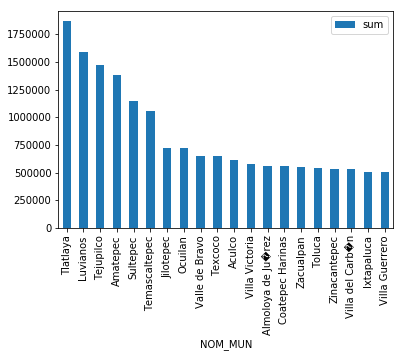

In [37]:
km_rios_x_municipio.largo.sort_values(by='sum',ascending=False)\
                    .head(20).plot(kind='bar')



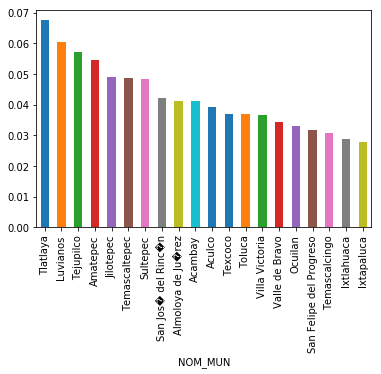

In [43]:
edomex=municipios.loc[municipios.CVE_ENT=='15',:]
edomex.index=edomex.NOM_MUN
edomex.area.sort_values(ascending=False).head(20).plot(kind='bar')